<a href="https://colab.research.google.com/github/vis-hal-k/Data_science_self-Practice/blob/main/Coursera_course/%23C2-Convolutional_Neural_Network/W4-materials/Lab1_c2w4_MultiClassClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Multi-class Classifier

In this lab, you will look at how to build a model to distinguish between more than two classes. The code will be similar to the ones you've been using before with a few key changes in the model and in the training parameters. Let's dive in!


### Download and Prepare the Dataset
You will be using the [Rock-Paper-Scissors dataset](https://www.tensorflow.org/datasets/catalog/rock_paper_scissors), a gallery of hands images in Rock, Paper, and Scissors poses.

In [ ]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-07-07 18:21:58--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   199MB/s    in 1.0s    

2023-07-07 18:21:59 (199 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-07-07 18:21:59--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test

In [ ]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

As usual, you will assign the directory names into variables and look at the filenames as a snity check.

In [ ]:
import os
base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir , 'rock')
paper_dir = os.path.join(base_dir , 'paper')
scissors_dir = os.path.join(base_dir , 'scissors')

print('total training rock images:' , len(os.listdir(rock_dir)))
print('total training paper images:' , len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print(rock_files[:10])
print(paper_files[:10])
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-004.png', 'rock02-085.png', 'rock02-063.png', 'rock05ck01-081.png', 'rock03-050.png', 'rock04-020.png', 'rock04-038.png', 'rock05ck01-063.png', 'rock04-021.png', 'rock02-114.png']
['paper06-066.png', 'paper04-003.png', 'paper02-067.png', 'paper03-102.png', 'paper02-096.png', 'paper05-021.png', 'paper04-046.png', 'paper04-047.png', 'paper01-069.png', 'paper07-048.png']
['testscissors01-055.png', 'scissors02-109.png', 'scissors01-081.png', 'scissors04-012.png', 'scissors01-039.png', 'scissors04-034.png', 'testscissors01-048.png', 'scissors02-011.png', 'scissors01-075.png', 'scissors01-000.png']


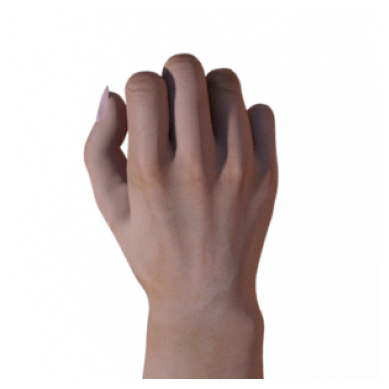

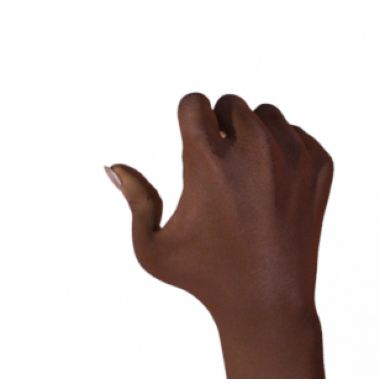

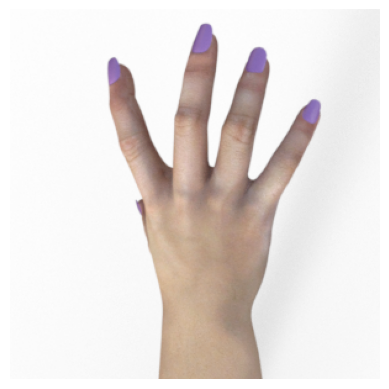

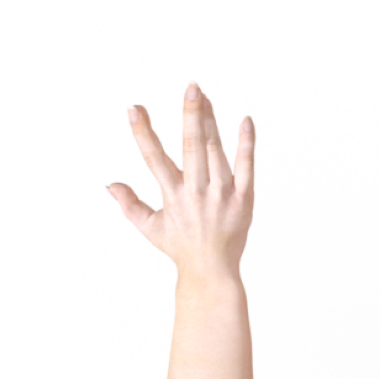

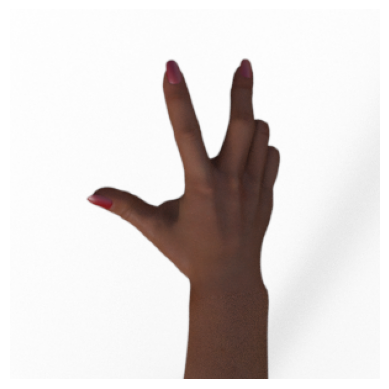

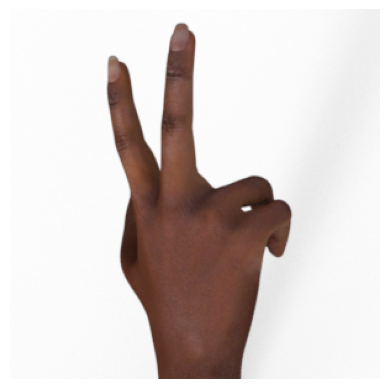

In [ ]:
# You can also inspect some of the images to see the variety in your model inputs.
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Build the model
You will then build your CNN. You will use 4 convolution layers with 64-64-128-128 filters then append a `Dropout` layer to avoid overfitting and some Dense layers for the classification. The output layer would be a 3-neuron dense layer activated by [Softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax). You've seen this in Course 1 when you were training with Fashion MNIST. It scales your output to a set of probabilities that add up to 1. The order of this 3-neuron output would be `paper` - `rock` - `scissors` (e.g. a `[0.8 , 0.2, 0.0]`) output means the model is predictiong 80% probablity for paper and 20% probablity for rock.

You can examine the architecture with `model.summary()` below.

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu' , input_shape=(150,150,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),

                                   tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),

                                   tf.keras.layers.Conv2D(128 , (3,3) , activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),

                                   tf.keras.layers.Conv2D(128, (3,3) , activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dropout(0.5),

                                   tf.keras.layers.Dense(512, activation='relu'),
                                   tf.keras.layers.Dense(3,activation = 'sigmoid')
                                   ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

You will then compile the model. The key change here is the `loss` function. Whereas before you were using `binary_crossentropy` for 2 Classes, you will change it to [categorical_crossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-function) to extend it to more classes.

In [ ]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'rmsprop' , metrics = ['accuracy'])

## Prepare the ImageDataGenerator
you will prepare the generators as before. You will set the training set up for data augmentation so it can mimick other poses that the model needs to learn.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(
    rescale = 1./255 ,
    rotation_range = 40 ,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    shear_range = 0.2 ,
    horizontal_flip = True ,
    fill_mode = 'nearest'
)
TRAINING_DIR = "tmp/rps-train/rps"
VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150,150),
    class_mode = 'categorical' ,
    batch_size = 126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150,150),
    class_mode = 'categorical' ,
    batch_size = 126
)




Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Train the model and evaluate the results

You will train for 25 epochs and evaludate the results afterwards. Observe how both the training and validation accuracy are trending upwards. This is a good indication that the model is not overfitting to only your training set.



In [ ]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 47s 1s/step - loss: 1.1492 - accuracy: 0.3393 - val_loss: 1.0973 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 34s 2s/step - loss: 1.1007 - accuracy: 0.3710 - val_loss: 1.0923 - val_accuracy: 0.4570
Epoch 3/25
20/20 [==============================] - 29s 1s/step - loss: 1.0905 - accuracy: 0.3940 - val_loss: 1.0749 - val_accuracy: 0.5726
Epoch 4/25
20/20 [==============================] - 32s 2s/step - loss: 1.0963 - accuracy: 0.4595 - val_loss: 0.9220 - val_accuracy: 0.6694
Epoch 5/25
20/20 [==============================] - 32s 2s/step - loss: 0.9870 - accuracy: 0.5190 - val_loss: 0.8907 - val_accuracy: 0.6478
Epoch 6/25
20/20 [==============================] - 36s 2s/step - loss: 0.8142 - accuracy: 0.6310 - val_loss: 0.8067 - val_accuracy: 0.5457
Epoch 7/25
20/20 [==============================] - 26s 1s/step - loss: 0.8135 - accuracy: 0.6611 - val_loss: 0.4435 - val_accuracy: 0.7876
Epoch 8/25
20/20 [==

# Model Prediction


You should be able to upload an image here and have it classified without crashing. This codeblock will only work in Google Colab, however. You can use your own images or use the ones available [here](https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip)


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import img_to_array , load_img

uploaded = files.upload()
for fn in uploaded.keys():
  # predicting images
  path = fn
  img = load_img(path , target_size=(150,150))
  x = img_to_array(img)
  x= np.expand_dims(x,axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(fn)
  print(classes)

Saving testpaper01-06.png to testpaper01-06.png
1/1 [==============================] - 0s 293ms/step
testpaper01-06.png
[[1. 0. 1.]]


## Wrap Up

That concludes this short exercise on the multi-class classifiers. You saw that with just a few changes, you were able to convert your binary classifiers to predict more classes. You used the same techniques for data and model preparation and were able to get relatively good results in just 25 epochs. For practice, you can search for other datasets (e.g. [here](https://archive.ics.uci.edu/ml/datasets.php)) with more classes and revise the model to accomodate it. Try to experiment with different layers and data augmentation techniques to improve your metrics.